In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set({'figure.figsize': (15, 5)})
sns.set_palette('colorblind')

In [42]:
totdat = pd.DataFrame([])
fits = pd.DataFrame([])
logpath_t = '../logs/coopfixed2_newfunc/{}_rep_{}/'
for rep in range(6):
    for cond in ['fake', 'nofake']:
        logpath = logpath_t.format(cond, rep)
        try:
            data = pd.read_csv(logpath + 'analysis_log.txt', delimiter="\t")
        except FileNotFoundError as e:
            print(repr(e))
        else:
            fit = pd.read_csv(logpath + 'fitnesslog.txt', delimiter="\t")
            fit['cond'] = cond
            fit['rep'] = rep
            fits = pd.concat((fits, fit), ignore_index=True)
            data['ind'] = data['ind'] + rep * 100
            data['cond'] = cond
            curind = data
            curind['realinv'] = np.where(curind['onOpp'], curind['ownCoop'], np.nan)
            totinv = curind.groupby(('cond', 'coop', 'ind'), as_index=False).mean()
            totinv['totinv'] = curind.groupby(('cond', 'coop', 'ind'), as_index=False).sum()['realinv']
            totdat = pd.concat((totdat, totinv), ignore_index=True)


FileNotFoundError("File b'../logs/coopfixed2_newfunc/nofake_rep_1/analysis_log.txt' does not exist",)


/home/paul/miniconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


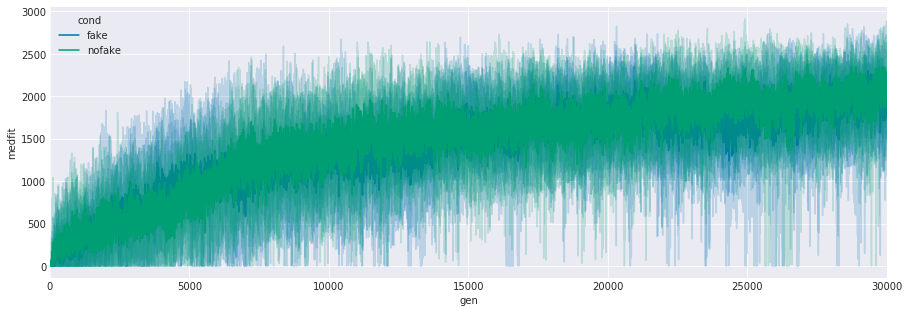

In [43]:
sns.tsplot(data=fits, time='gen', unit='rep', value='medfit', condition='cond', err_style='unit_traces')

Text(6.675,0.5,'propre coopération $x_.$')

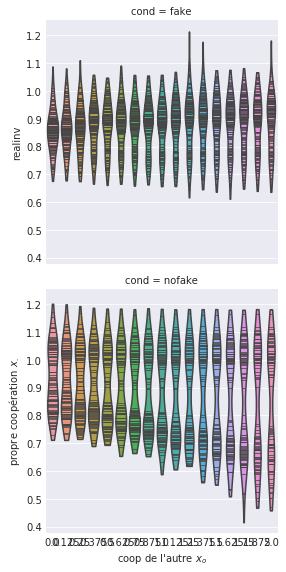

In [33]:
sns.factorplot(data=totdat, x='coop', y='realinv', row="cond", cut=0, inner='sticks', kind='violin')
plt.xlabel('coop de l\'autre $x_o$')
plt.ylabel('propre coopération $x_.$')


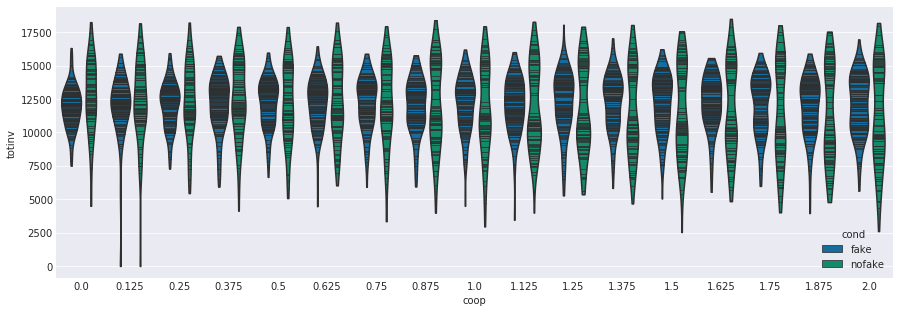

In [34]:
sns.violinplot(data=totdat, hue='cond', x='coop', y='totinv', cut=0, inner='sticks')

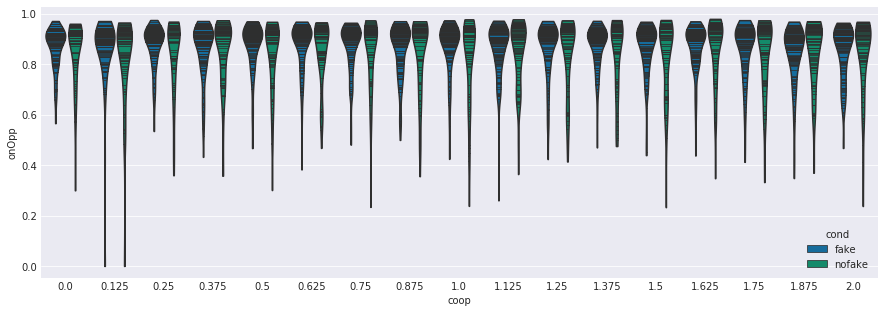

In [35]:
sns.violinplot(data=totdat, hue='cond', x='coop', y='onOpp', cut=0, inner='sticks')